### Import Packages and Gathering Data

In [479]:
import requests

In [480]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [481]:
# Save HTML to file
with open("image-prediction.tsv", mode='wb') as file:
    file.write(response.content)

In [482]:
import pandas as pd

In [483]:
import numpy as np

In [484]:
import os

In [485]:
import json

In [486]:
from timeit import default_timer as timer

In [487]:
import re

In [488]:
# read the csv file

In [489]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [490]:
# read the tsv file

In [491]:
from pandas import DataFrame
image = DataFrame.from_csv("image-prediction.tsv", sep="\t")

In [492]:
# print tweet_ids
tweet_id = archive['tweet_id'].astype(str)
print(tweet_id)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888202515573088257
20      888078434458587136
21      887705289381826560
22      887517139158093824
23      887473957103951883
24      887343217045368832
25      887101392804085760
26      886983233522544640
27      886736880519319552
28      886680336477933568
29      886366144734445568
               ...        
2326    666411507551481857
2327    666407126856765440
2328    666396247373291520
2329    666373753744588802
2330    666362758909284353
2331    666353288456101888
2

In [493]:
# gathering twitter data from API using python tweepy library
import tweepy

consumer_key = 'xxxxconsumer_secret = 'xxxxaccess_token = 'xxxxaccess_secret = 'xxxx
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth)


In [404]:
# Storing each tweet in a JSON file
tweet_ids = archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

tweet_ids = archive['tweet_id'].astype(str)
tweet_errors = {}

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile, sort_keys = True, indent=4, ensure_ascii = False)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Fail
1046: 743595368194129920
Fail
1047: 743545585370791937
Fail
1048: 743510151680958465
Fail
1049: 743253157753532416
Fail
1050: 743222593470234624
Fail
1051: 743210557239623680
Fail
1052: 742534281772302336
Fail
1053: 742528092657332225
Fail
1054: 742465774154047488
Fail
1055: 742423170473463808
Fail
1056: 742385895052087300
Fail
1057: 742161199639494656
Fail
1058: 742150209887731712
Fail
1059: 741793263812808706
Fail
1060: 741743634094141440
Fail
1061: 741438259667034112
Fail
1062: 741303864243200000
Fail
1063: 741099773336379392
Fail
1064: 741067306818797568
Fail
1065: 740995100998766593
Fail
1066: 740711788199743490
Fail
1067: 740699697422163968
Fail
1068: 740676976021798912
Fail
1069: 740373189193256964
Fail
1070: 740365076218183684
Fail
1071: 740359016048689152
Fail
1072: 740214038584557568
Fail
1073: 739979191639244800
Fail
1074: 739932936087216128
Fail
1075: 739844404073074688
Fail
1076: 739623569819336705
Fail
1077: 739606147276148736
Fail
1078: 739544079319588864
Fail
1079:

Fail
1321: 706346369204748288
Fail
1322: 706310011488698368
Fail
1323: 706291001778950144
Fail
1324: 706265994973601792
Fail
1325: 706169069255446529
Fail
1326: 706166467411222528
Fail
1327: 706153300320784384
Fail
1328: 705975130514706432
Fail
1329: 705970349788291072
Fail
1330: 705898680587526145
Fail
1331: 705786532653883392
Fail
1332: 705591895322394625
Fail
1333: 705475953783398401
Fail
1334: 705442520700944385
Fail
1335: 705428427625635840
Fail
1336: 705239209544720384
Fail
1337: 705223444686888960
Fail
1338: 705102439679201280
Fail
1339: 705066031337840642
Fail
1340: 704871453724954624
Fail
1341: 704859558691414016
Fail
1342: 704847917308362754
Fail
1343: 704819833553219584
Fail
1344: 704761120771465216
Fail
1345: 704499785726889984
Fail
1346: 704491224099647488
Fail
1347: 704480331685040129
Fail
1348: 704364645503647744
Fail
1349: 704347321748819968
Fail
1350: 704134088924532736
Fail
1351: 704113298707505153
Fail
1352: 704054845121142784
Fail
1353: 703774238772166656
Fail
1354:

Fail
1596: 686358356425093120
Fail
1597: 686286779679375361
Fail
1598: 686050296934563840
Fail
1599: 686035780142297088
Fail
1600: 686034024800862208
Fail
1601: 686007916130873345
Fail
1602: 686003207160610816
Fail
1603: 685973236358713344
Fail
1604: 685943807276412928
Fail
1605: 685906723014619143
Fail
1606: 685681090388975616
Fail
1607: 685667379192414208
Fail
1608: 685663452032069632
Fail
1609: 685641971164143616
Fail
1610: 685547936038666240
Fail
1611: 685532292383666176
Fail
1612: 685325112850124800
Fail
1613: 685321586178670592
Fail
1614: 685315239903100929
Fail
1615: 685307451701334016
Fail
1616: 685268753634967552
Fail
1617: 685198997565345792
Fail
1618: 685169283572338688
Fail
1619: 684969860808454144
Fail
1620: 684959798585110529
Fail
1621: 684940049151070208
Fail
1622: 684926975086034944
Fail
1623: 684914660081053696
Fail
1624: 684902183876321280
Fail
1625: 684880619965411328
Fail
1626: 684830982659280897
Fail
1627: 684800227459624960
Fail
1628: 684594889858887680
Fail
1629:

Fail
1871: 675149409102012420
Fail
1872: 675147105808306176
Fail
1873: 675146535592706048
Fail
1874: 675145476954566656
Fail
1875: 675135153782571009
Fail
1876: 675113801096802304
Fail
1877: 675111688094527488
Fail
1878: 675109292475830276
Fail
1879: 675047298674663426
Fail
1880: 675015141583413248
Fail
1881: 675006312288268288
Fail
1882: 675003128568291329
Fail
1883: 674999807681908736
Fail
1884: 674805413498527744
Fail
1885: 674800520222154752
Fail
1886: 674793399141146624
Fail
1887: 674790488185167872
Fail
1888: 674788554665512960
Fail
1889: 674781762103414784
Fail
1890: 674774481756377088
Fail
1891: 674767892831932416
Fail
1892: 674764817387900928
Fail
1893: 674754018082705410
Fail
1894: 674752233200820224
Fail
1895: 674743008475090944
Fail
1896: 674742531037511680
Fail
1897: 674739953134403584
Fail
1898: 674737130913071104
Fail
1899: 674690135443775488
Fail
1900: 674670581682434048
Fail
1901: 674664755118911488
Fail
1902: 674646392044941312
Fail
1903: 674644256330530816
Fail
1904:

Fail
2145: 669942763794931712
Fail
2146: 669926384437997569
Fail
2147: 669923323644657664
Fail
2148: 669753178989142016
Fail
2149: 669749430875258880
Fail
2150: 669684865554620416
Fail
2151: 669683899023405056
Fail
2152: 669682095984410625
Fail
2153: 669680153564442624
Fail
2154: 669661792646373376
Fail
2155: 669625907762618368
Fail
2156: 669603084620980224
Fail
2157: 669597912108789760
Fail
2158: 669583744538451968
Fail
2159: 669573570759163904
Fail
2160: 669571471778410496
Fail
2161: 669567591774625800
Fail
2162: 669564461267722241
Fail
2163: 669393256313184256
Fail
2164: 669375718304980992
Fail
2165: 669371483794317312
Fail
2166: 669367896104181761
Fail
2167: 669363888236994561
Fail
2168: 669359674819481600
Fail
2169: 669354382627049472
Fail
2170: 669353438988365824
Fail
2171: 669351434509529089
Fail
2172: 669328503091937280
Fail
2173: 669327207240699904
Fail
2174: 669324657376567296
Fail
2175: 669216679721873412
Fail
2176: 669214165781868544
Fail
2177: 669203728096960512
Fail
2178:

In [494]:
# Create a dataframe
df_3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json2.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_3 = df_3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]], columns=['tweet_id', 'retweet_count', 'favorite_count']))

In [495]:
# Saving the dataframe
df_3.to_csv ("tweepy_api.csv", index=False)

### Assess

In [496]:
#Reading the three files
tweets = pd.read_csv("tweepy_api.csv")
archive = pd.read_csv('twitter-archive-enhanced.csv')
image = DataFrame.from_csv("image-prediction.tsv", sep="\t")

In [497]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [498]:
# display five initial rows
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [499]:
# sampling 5 more rows to check if the missing values are constant or not
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
409,823333489516937216,8.233264e+17,1.582854e+09,2017-01-23 00:56:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@HistoryInPics 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
2319,666447344410484738,NaN,NaN,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666447344...,9,10,Scout,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Jamesy. He gives a kiss...,8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
2084,670807719151067136,NaN,NaN,2015-11-29 03:33:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Andy. He can balance on one foot,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670807719...,11,10,Andy,None,None,None,None
1473,693647888581312512,NaN,NaN,2016-01-31 04:11:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a pic without a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693647888...,7,10,None,None,None,None,None


In [500]:
# checking for filled rows in each columns and datatypes
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [501]:
# counting different names looking for quality issues
archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Toby           7
an             7
Bailey         7
Daisy          7
Jax            6
Koda           6
Scout          6
Leo            6
Milo           6
Stanley        6
Oscar          6
Bella          6
Jack           6
Dave           6
Rusty          6
Bentley        5
            ... 
Monty          1
Sprinkles      1
Jangle         1
Cilantro       1
Herb           1
Dudley         1
Brudge         1
Combo          1
Claude         1
Poppy          1
Mingus         1
Koko           1
Saydee         1
Jackie         1
Marvin         1
Cora           1
Chef           1
Jazzy          1
Harry          1
Alexander      1
Brandi         1
Sailor         1
Geoff          1
Simba          1
Crawford       1
Laela          1
Suki           1
Schnozz       

In [502]:
image.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [503]:
image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
jpg_url    2075 non-null object
img_num    2075 non-null int64
p1         2075 non-null object
p1_conf    2075 non-null float64
p1_dog     2075 non-null bool
p2         2075 non-null object
p2_conf    2075 non-null float64
p2_dog     2075 non-null bool
p3         2075 non-null object
p3_conf    2075 non-null float64
p3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [504]:
image.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [505]:
image.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
beagle                        18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [506]:
image.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [507]:
image.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Chesapeake_Bay_retriever          27
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [508]:
image.sample(20)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American_Staffordshire_terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire_bullterrier,0.072799,True
714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,1,collie,0.176758,True,Chesapeake_Bay_retriever,0.101834,True,beagle,0.101294,True
748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,rotisserie,0.471493,False,cash_machine,0.250837,False,sliding_door,0.117872,False
724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,0.037208,True
675111688094527488,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,Labrador_retriever,0.631501,True,Brittany_spaniel,0.101927,True,Chesapeake_Bay_retriever,0.062650,True
736736130620620800,https://pbs.twimg.com/media/CjlpmZaUgAED54W.jpg,1,schipperke,0.545502,True,groenendael,0.298622,True,Labrador_retriever,0.030986,True
679722016581222400,https://pbs.twimg.com/media/CW7bkW6WQAAksgB.jpg,1,boxer,0.459604,True,Boston_bull,0.197913,True,French_bulldog,0.087023,True


In [509]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [510]:
tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [511]:
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [512]:
image['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

## Assesment Conclusion
1. Tidiness issue. Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

2. Quality issue. Files contain not original ratings (retweets) and tweets without images.

3. Quality issue. Missing values in six columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_stautus_user_id, retweeted_status_timestamp, expanded_urls).

4. Tidiness issue. Dog stages should be one variable that has been separated into 4 differnt columns.

5. Quality issue. Delete duplicated tweet_ids.

6. Quality issue. The numerator and denominator columns have not accurate values.

7. Quality issue. Erroneous datatypes: floats instead objects (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id; integers instead of objects (tweet_id); objects instead of time data (timestamp and retweeted_status_timestamp); integers instead floats (rating_numerator and rating_denominator)

8. Quality issue. Missing names: 745 dogs have been registered without name (none), 55 have been registered with "a" and 7 with "an" and also lowercase, that makes me doubt of it´s accuracy. 

9. Quality issue. Some column headers are not descriptive enough (img_num, p1, p1_conf, p1_dog,p1, p2_conf, p2_dog, p3, p3_conf, p3_dog)

10. Quality issue. Not very clear data in "source" column.

11. Quality issue. Erroneous dog breeds.

12. Quality issue. Delete unuseful colums (p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)

### Cleaning

In [513]:
# copy creation for avoiding data loss

In [514]:
archive_clean3 = archive.copy()
image_clean3 = image.copy()
tweets_clean3 = tweets.copy()

1. Definition: Merging three datafiles as to the same observational unit.

Coding:

In [515]:
archive_clean3 = pd.merge(left=archive_clean3,
                                 right=tweets_clean3, left_on='tweet_id', right_on='tweet_id', how='inner')

In [516]:
archive_clean3 = archive_clean3.merge(image_clean3, left_on='tweet_id', right_index=True, how='inner')

Testing:

In [517]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

2. Definition: delete not original dog ratings and  tweets without images.

Coding:

In [518]:
# Delete retweets
archive_clean3 = archive_clean3[pd.isnull(archive_clean3.retweeted_status_id)]

In [519]:
# Delete tweets without pictures
archive_clean3 = archive_clean3.dropna(subset = ['jpg_url'])

Testing:

In [520]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

In [521]:
print (archive_clean3["jpg_url"])

0         https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1         https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2         https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3         https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4         https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5         https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6         https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7         https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8         https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9         https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10        https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
11        https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg
12        https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg
13        https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg
14        https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg
15      https://pbs.twimg.com/ext_tw_video_thumb/88927...
16        https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg
17        http

3. Definition: Delete remove all rows without values (not blank or non-null) in retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

Coding:

In [522]:
# Delete retweets columns
archive_clean3 = archive_clean3.drop('retweeted_status_id', 1)
archive_clean3 = archive_clean3.drop('retweeted_status_user_id', 1)
archive_clean3 = archive_clean3.drop('retweeted_status_timestamp', 1)

Testing:

In [523]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2353
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  19

4. Definition: Merging "dog stages" columns.

Coding:

In [524]:
# Select the columns to combine and the base columns
Combining = ['doggo', 'floofer', 'pupper', 'puppo']
Base = [x for x in archive_clean3.columns.tolist() if x not in Combining]

# Combining the the columns into values
archive_clean3 = pd.melt(archive_clean3, id_vars = Base, value_vars = Combining, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
archive_clean3 = archive_clean3.drop('stages', 1)

Testing:

In [525]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 24 columns):
tweet_id                 7976 non-null int64
in_reply_to_status_id    92 non-null float64
in_reply_to_user_id      92 non-null float64
timestamp                7976 non-null object
source                   7976 non-null object
text                     7976 non-null object
expanded_urls            7976 non-null object
rating_numerator         7976 non-null int64
rating_denominator       7976 non-null int64
name                     7976 non-null object
retweet_count            7976 non-null int64
favorite_count           7976 non-null int64
jpg_url                  7976 non-null object
img_num                  7976 non-null int64
p1                       7976 non-null object
p1_conf                  7976 non-null float64
p1_dog                   7976 non-null bool
p2                       7976 non-null object
p2_conf                  7976 non-null float64
p2_dog                   79

In [526]:
print(archive_clean3.dog_stage.value_counts())
print(len(archive_clean3))

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64
7976


5. Definition: Delete duplicated tweet_ids

Coding:

In [527]:
#Delete duplicate rows to get the starting rows number: 1994
archive_clean3 = archive_clean3.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

Testing:

In [528]:
print(archive_clean3.dog_stage.value_counts())
print(len(archive_clean3))

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1994


In [529]:
archive_clean3.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1918,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,...,Saint_Bernard,0.381377,True,Leonberg,0.127998,True,golden_retriever,0.069357,True,None
1917,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,...,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True,None
1916,667437278097252352,NaN,NaN,2015-11-19 20:20:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,...,porcupine,0.989154,False,bath_towel,0.006300,False,badger,0.000966,False,None
1915,667443425659232256,NaN,NaN,2015-11-19 20:44:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,...,goose,0.980815,False,drake,0.006918,False,hen,0.005255,False,None
1914,667453023279554560,NaN,NaN,2015-11-19 21:22:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,...,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,None


6. Definition: correctly cleaned rating_numerator and denominator columns.

Coding:

In [530]:
# select non expected numerators
not_clean = archive_clean3[archive_clean3.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Testing

In [531]:
not_clean

1911    Two dogs in this one. Both are rare Jujitsu Py...
1902    This is Kial. Kial is either wearing a cape, w...
1944    These are Peruvian Feldspars. Their names are ...
1973    This is an Albanian 3 1/2 legged  Episcopalian...
3212    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
3201    This is Eriq. His friend just reminded him of ...
3151    Meet Oliviér. He takes killer selfies. Has a d...
3146    This may be the greatest video I've ever been ...
3186    When bae says they can't go out but you see th...
3322    This is Darrel. He just robbed a 7/11 and is i...
2919    This is Bluebert. He just saw that both #Final...
2935    Meet Travis and Flurp. Travis is pretty chill ...
3056    This is Socks. That water pup w the super legs...
3702    Meet Holly. She's trying to teach small human-...
3649    10/10 for dog. 7/10 for cat. 12/10 for human. ...
3814    Here we have Pancho and Peaches. Pancho is a C...
3851    This is Spark. He's nervous. Other dog hasn't ...
3751    Meet H

In [532]:
# Loop to fixing
for entry in not_clean:
    mask = archive_clean3.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    archive_clean3.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    archive_clean3.loc[mask, column_name2] = 10

Testing:

In [533]:
print(archive_clean3)

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1918  667405339315146752                    NaN                  NaN   
1917  667435689202614272                    NaN                  NaN   
1916  667437278097252352                    NaN                  NaN   
1915  667443425659232256                    NaN                  NaN   
1914  667453023279554560                    NaN                  NaN   
1913  667455448082227200                    NaN                  NaN   
1912  667470559035432960                    NaN                  NaN   
1911  667491009379606528                    NaN                  NaN   
1910  667495797102141441                    NaN                  NaN   
1909  667502640335572993                    NaN                  NaN   
1908  667509364010450944                    NaN                  NaN   
1907  667517642048163840                    NaN                  NaN   
1906  667524857454854144                    NaN                 

In [534]:
# We can check it better with .isin() fucntion
archive_clean3[archive_clean3.text.isin(not_clean)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1911,667491009379606528,NaN,NaN,2015-11-19 23:53:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,8,10,None,...,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False,None
1902,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,4,10,Kial,...,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True,None
1944,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,https://twitter.com/dog_rates/status/666835007...,10,10,None,...,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False,None
1973,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,...,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True,None
3212,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,...,collie,0.600186,True,Shetland_sheepdog,0.298939,True,borzoi,0.022616,True,None
3201,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,...,Pembroke,0.426459,True,papillon,0.317368,True,Shetland_sheepdog,0.077616,True,None
3151,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,...,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True,None
3146,695064344191721472,NaN,NaN,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,...,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False,None
3186,691483041324204033,NaN,NaN,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,...,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True,None
3322,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,...,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False,None


7. Definition: Change datatypes

Coding:

In [535]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null object
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                 

In [536]:
#Change "tweet_id" to string (object)
archive_clean3['tweet_id'] = archive_clean3['tweet_id'].astype(str)
#Change "in_reply_to_status_id" to string (object)
archive_clean3['in_reply_to_status_id'] = archive_clean3['in_reply_to_status_id'].astype(str)
#Change "in_reply_to_user_id" to string (object)
archive_clean3['in_reply_to_user_id'] = archive_clean3['in_reply_to_user_id'].astype(str)
#Change "timestamp" to time data
archive_clean3['timestamp'] = pd.to_datetime(archive_clean3["timestamp"])
# Change "rating_numerator" to float
archive_clean3['rating_numerator'] = archive_clean3['rating_numerator'].astype('float')
# Change "denominator" to float
archive_clean3['rating_denominator'] = archive_clean3['rating_denominator'].astype('float')

Testing:

In [537]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog   

8. Definition: Delete of lowercase and missing names

Coding:

In [538]:
archive_clean3 = archive_clean3[archive_clean3['name'].str.istitle()]

In [539]:
archive_clean3 = archive_clean3[archive_clean3['name'] != 'None']

Testing:

In [540]:
archive_clean3.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
3686,671511350426865664,nan,nan,2015-12-01 02:09:16,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Hammond. He's just a wee lil pup....,https://twitter.com/dog_rates/status/671511350...,8.0,10.0,Hammond,...,hermit_crab,0.625409,False,tick,0.127333,False,snail,9.791590e-02,False,None
2634,761292947749015552,nan,nan,2016-08-04 20:09:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11.0,10.0,Bonaparte,...,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,8.833830e-03,True,None
3756,670420569653809152,nan,nan,2015-11-28 01:54:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Damon. The newest presidential candida...,https://twitter.com/dog_rates/status/670420569...,10.0,10.0,Damon,...,bow_tie,0.268759,False,cardigan,0.153957,False,wig,7.229490e-02,False,None
2721,749774190421639168,nan,nan,2016-07-04 01:17:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,12.0,10.0,Lucy,...,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,2.104100e-02,True,None
2458,793226087023144960,nan,nan,2016-10-31 23:00:11,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",https://twitter.com/dog_rates/status/793226087...,11.0,10.0,Juno,...,wire-haired_fox_terrier,0.456047,True,Lakeland_terrier,0.273428,True,English_springer,8.364330e-02,True,None
3122,697575480820686848,nan,nan,2016-02-11 00:18:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Ole. He's not sure how to gravity. 8/1...,https://twitter.com/dog_rates/status/697575480...,8.0,10.0,Ole,...,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,1.025950e-01,True,None
3088,700002074055016451,nan,nan,2016-02-17 17:01:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,https://twitter.com/dog_rates/status/700002074...,9.0,10.0,Thumas,...,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,1.616140e-01,True,None
2370,812781120811126785,nan,nan,2016-12-24 22:04:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Swagger. He's the Cleveland Browns amb...,https://twitter.com/dog_rates/status/812781120...,10.0,10.0,Swagger,...,bull_mastiff,0.989316,True,boxer,0.007043,True,French_bulldog,1.739610e-03,True,None
3523,675015141583413248,nan,nan,2015-12-10 18:12:05,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moe. He's a golden Fetty Woof. Doesn't re...,https://twitter.com/dog_rates/status/675015141...,10.0,10.0,Moe,...,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,1.321730e-01,False,None
2487,788765914992902144,nan,nan,2016-10-19 15:37:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,https://twitter.com/dog_rates/status/788765914...,12.0,10.0,Butter,...,cocker_spaniel,0.500509,True,golden_retriever,0.272734,True,jigsaw_puzzle,4.147580e-02,False,None


9. Definition: Changing Header for a better understanding

Coding:

In [541]:
archive_clean3.rename(columns={'p1':'Pred_1', 'p1_conf':'conf_degree_Pred_1', 'p1_dog':'Pred.1_T/F',
                               'p2':'Pred_2', 'p2_conf':'conf_degree_Pred_2', 'p2_dog':'Pred.2_T/F',
                               'p3':'Pred_3', 'p3_conf':'conf_degree_Pred_3', 'p3_dog':'Pred.3_T/F'}, inplace=True)

Testing:

In [542]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 1918 to 6764
Data columns (total 24 columns):
tweet_id                 1344 non-null object
in_reply_to_status_id    1344 non-null object
in_reply_to_user_id      1344 non-null object
timestamp                1344 non-null datetime64[ns]
source                   1344 non-null object
text                     1344 non-null object
expanded_urls            1344 non-null object
rating_numerator         1344 non-null float64
rating_denominator       1344 non-null float64
name                     1344 non-null object
retweet_count            1344 non-null int64
favorite_count           1344 non-null int64
jpg_url                  1344 non-null object
img_num                  1344 non-null int64
Pred_1                   1344 non-null object
conf_degree_Pred_1       1344 non-null float64
Pred.1_T/F               1344 non-null bool
Pred_2                   1344 non-null object
conf_degree_Pred_2       1344 non-null float64
Pred.2_T/

10. Definition: Clean "source" column and make it readable.

In [543]:
archive_clean3.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1319
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

Coding:

In [544]:
archive_clean3['source'] = archive_clean3['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

Testing:

In [545]:
archive_clean3.source.value_counts()

Twitter for iPhone    1319
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

11. Definition: Clean dog breeds in "Pred_1" and delete colums "Pred_2", "conf_degree_Pred_2", "Pred.2_T/F","Pred_3", "conf_degree_Pred_3" 

Coding:

In [546]:
archive_clean3['Pred_1'].unique()

array(['Saint_Bernard', 'Labrador_retriever', 'Tibetan_terrier',
       'Chihuahua', 'Italian_greyhound', 'golden_retriever', 'Pembroke',
       'Pomeranian', 'toy_poodle', 'kuvasz', 'fire_engine', 'toyshop',
       'papillon', 'Siberian_husky', 'English_setter',
       'miniature_schnauzer', 'hay', 'hyena', 'Chesapeake_Bay_retriever',
       'miniature_pinscher', 'giant_schnauzer', 'jigsaw_puzzle',
       'seat_belt', 'malamute', 'Norwegian_elkhound', 'leatherback_turtle',
       'miniature_poodle', 'German_shepherd', 'Blenheim_spaniel',
       'toy_terrier', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'orange', 'Bernese_mountain_dog', 'Saluki',
       'basset', 'French_bulldog', 'convertible', 'whippet', 'Samoyed',
       'Irish_terrier', 'Appenzeller', 'paper_towel', 'pug', 'vizsla',
       'tabby', 'tricycle', 'English_springer',
       'German_short-haired_pointer', 'street_sign', 'tusker', 'web_site',
       'Eskimo_dog', 'Doberman', 'Weimaraner', 'cocker_spanie

In [547]:
rep = ['fire_engine', 'toyshop','hay', 'hyena', 'jigsaw_puzzle',
       'seat_belt', 'malamute', 'leatherback_turtle', 'orange', 'convertible',
       'tricycle', 'web_site', 'crane', 'motor_scooter', 'refrigerator', 
       'car_mirror', 'bath_towel','teddy','snorkel','minivan', 'bluetick',
       'Christmas_stocking', 'tub', 'carousel', 'llama', 'dishwasher', 'swing', 
       'goose', 'triceratops', 'ice_bear', 'timber_wolf', 'nail', 'space_heater',
       'mousetrap', 'hippopotamus',  'hummingbird', 'hamster', 'tailed_frog',
       'Egyptian_cat', 'window_shade', 'earthstar', 'hermit_crab', 'pitcher', 
       'banana', 'wood_rabbit', 'microwave', 'sandbar','park_bench', 'stone_wall',
       'prayer_rug', 'china_cabinet', 'shower_curtain', 'doormat', 'lynx', 
       'vacuum', 'canoe', 'crash_helmet', 'ox', 'seashore', 'boathouse',
       'mud_turtle', 'ping-pong_ball', 'common_iguana', 'bubble', 'cash_machine',
       'patio', 'toilet_tissue', 'bookcase', 'pool_table', 'quilt', 'gas_pump', 
       'remote_control', 'prison', 'fountain', 'washer', 'laptop', 'comic_book',
       'basketball', 'lakeside', 'marmot', 'shopping_cart', 'cowboy_boot',
       'leopard', 'birdhouse', 'cougar', 'balloon', 'radio_telescope', 'sunglasses',
       'maillot', 'koala', 'coral_reef', 'mortarboard', 'long-horned_beetle', 
       'lion', 'giant_panda', 'cup', 'sliding_door', 'espresso', 'pedestal', 
       'dining_table', 'bison', 'starfish', 'leaf_beetle', 'American_black_bear', 
       'carton', 'wooden_spoon', 'porcupine','ice_lolly', 'sorrel', 'bow','wombat',
       'alp', 'lawn_mower', 'rapeseed', 'skunk', 'sulphur-crested_cockatoo',
       'home_theater', 'shield', 'sea_lion','tennis_ball', 'cowboy_hat', 'hotdog',
       'bathtub', 'dingo', 'bow_tie', 'guinea_pig', 'beaver', 'damselfly', 'harp',
       'dogsled', 'Siamese_cat', 'agama', 'meerkat', 'wallaby', 'otter', 'dhole', 
       'weasel', 'picket_fence', 'muzzle', 'guenon', 'piggy_bank', "jack-o'-lantern",
       'acorn_squash', 'snail', 'Arctic_fox', 'ostrich', 'stove', 'African_crocodile',
       'cuirass', 'ski_mask', 'hand_blower','slug', 'komondor', 'tick', 'axolotl',
       'bee_eater', 'brown_bear', 'grey_fox', 'brown_bear']
archive_clean3=archive_clean3.replace(rep,np.nan).dropna(axis = 0, how = 'any')
archive_clean3['Pred_1'].unique()

array(['Saint_Bernard', 'Labrador_retriever', 'Tibetan_terrier',
       'Italian_greyhound', 'golden_retriever', 'Pembroke', 'Pomeranian',
       'kuvasz', 'papillon', 'English_setter', 'miniature_schnauzer',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'toy_poodle',
       'miniature_pinscher', 'giant_schnauzer', 'miniature_poodle',
       'German_shepherd', 'Blenheim_spaniel', 'toy_terrier',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Bernese_mountain_dog', 'Saluki', 'French_bulldog', 'basset',
       'whippet', 'Samoyed', 'Irish_terrier', 'paper_towel', 'pug',
       'vizsla', 'English_springer', 'street_sign', 'tusker', 'Doberman',
       'cocker_spaniel', 'chow', 'American_Staffordshire_terrier',
       'Scotch_terrier', 'collie', 'Old_English_sheepdog',
       'standard_poodle', 'borzoi', 'Shih-Tzu', 'Boston_bull',
       'Rottweiler', 'Staffordshire_bullterrier', 'Eskimo_dog',
       'bannister', 'groenendael', 'Australian_terrier', 'Maltese_dog',
  

In [548]:
archive_clean3.drop(['Pred_2','conf_degree_Pred_2','Pred.2_T/F', 'Pred_3', 'conf_degree_Pred_3', 'Pred.3_T/F'], axis=1, inplace=True)

In [549]:
archive_clean3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 1918 to 6044
Data columns (total 18 columns):
tweet_id                 868 non-null object
in_reply_to_status_id    868 non-null object
in_reply_to_user_id      868 non-null object
timestamp                868 non-null datetime64[ns]
source                   868 non-null object
text                     868 non-null object
expanded_urls            868 non-null object
rating_numerator         868 non-null float64
rating_denominator       868 non-null float64
name                     868 non-null object
retweet_count            868 non-null int64
favorite_count           868 non-null int64
jpg_url                  868 non-null object
img_num                  868 non-null int64
Pred_1                   868 non-null object
conf_degree_Pred_1       868 non-null float64
Pred.1_T/F               868 non-null bool
dog_stage                868 non-null object
dtypes: bool(1), datetime64[ns](1), float64(3), int64(3), object(10)
memory

In [550]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [551]:
# Saving the file to csv file
archive_clean3.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

### Analysis and visualization

What I want to check is the relation between the retweets and the favorit count.
My first suggestions is that both variables could be related. The higher the number of retweets the higher of favorite count. 

Text(0.5,1,'Retweets vs Favorites')

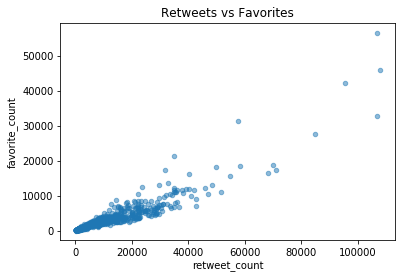

In [552]:
archive_clean3.plot(kind='scatter', x='favorite_count', y='retweet_count', alpha = 0.5)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Retweets vs Favorites')

Creating a scatterplot we see that there is at least a visual relation between each variable. Increasing the number of retweets we get higher number of favorites.

I want to check it programmatically by running the pearson correlation test in pandas

In [553]:
r = archive_clean3.corr(method="pearson")["favorite_count"]["retweet_count"]
print(r)

0.924631686087


There is a high correlation, not lineal, but strong enough to consider it high (0,92), between the variable "retweet count" and "favorite count". The nearer to the value: 1 the stronger the correlation.

We can have a deeper understanding of favorite and retweet distribution if we look to the "dog_stage".
First of all I want to know how the dog_stages are distributed by number of rows.

In [554]:
prop =archive_clean3.groupby(["dog_stage"])
prop["tweet_id"].count()

dog_stage
None       758
doggo       23
floofer      5
pupper      72
puppo       10
Name: tweet_id, dtype: int64

 What we observe is that the "None"-group is the highest in number. But we can "iterate the cleaning".

Definition: To clean the "dog_stages" variable of missing data ("None")

Coding and testing:

In [555]:
prop2 = archive_clean3[archive_clean3['dog_stage'] != 'None'].groupby(["dog_stage"])
prop2["tweet_id"].count()

dog_stage
doggo      23
floofer     5
pupper     72
puppo      10
Name: tweet_id, dtype: int64

What we get is information about the distribution of number of rows per dog_stages groups without the missing values.

And now what I´m looking for is for the number of "retweets" and "favorites" in relation to the dog_stages without the missing values.

In [556]:
prop3 = archive_clean3[archive_clean3['dog_stage'] != 'None'].groupby(["dog_stage"])
prop3["retweet_count", "favorite_count"].sum()

,retweet_count,favorite_count
dog_stage,,
doggo,143481,466068
floofer,11236,47795
pupper,178307,611874
puppo,35978,130694


And what we get is the distribution of the sum of retweets and favorites for each group. The highest number of retweets and favorites are for the pupper group, followed by the doggo, then the puppo and the less retweeted and favorites are the floofer.
As expected we see that retweet and favorites are correlated also by the groups. The groups with the highest rates of retweets are also teh groups with the highest rates in favorites and this happens also in the less retweeted groups.